In [18]:
!pip freeze > ../requirements.txt

In [5]:
# tools
import numpy as np
import pandas as pd
import geopandas as gpd
# functions
from shapely.geometry import Point
from pathlib import Path
from matplotlib import pyplot as plt

In [6]:
clicks = Path('../data/raw/clicks.csv.gzip')
clicks = pd.read_csv(clicks, compression='gzip')

## Ciudades en uruguay

Identificamos los pares unicos de latitud-longitud dentro del dataset y armamos un nuevo dataset conteniendo la

In [7]:
longlat = ['longitude', 'latitude']

In [10]:
geom = (clicks.loc[clicks.duplicated(subset=longlat)]
              .assign(geometry = lambda df: df[longlat].apply(Point, axis=1)))

In [13]:
cities = gpd.GeoDataFrame(geom[['geometry']])

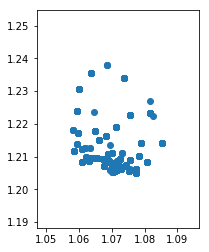

In [15]:
cities.plot()
plt.savefig('../assets/clicks_cities.svg')

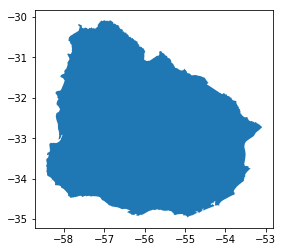

In [23]:
gpd.read_file('../data/external/URY_adm0.shp').plot()
plt.savefig('../assets/clicks_uruguay.svg')

In [51]:
geocities = gpd.GeoDataFrame(cities)

In [56]:
geocities.to_file('../data/interim/puntos_uru.shp')

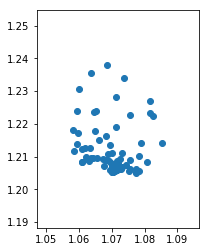

In [55]:
geocities.plot()

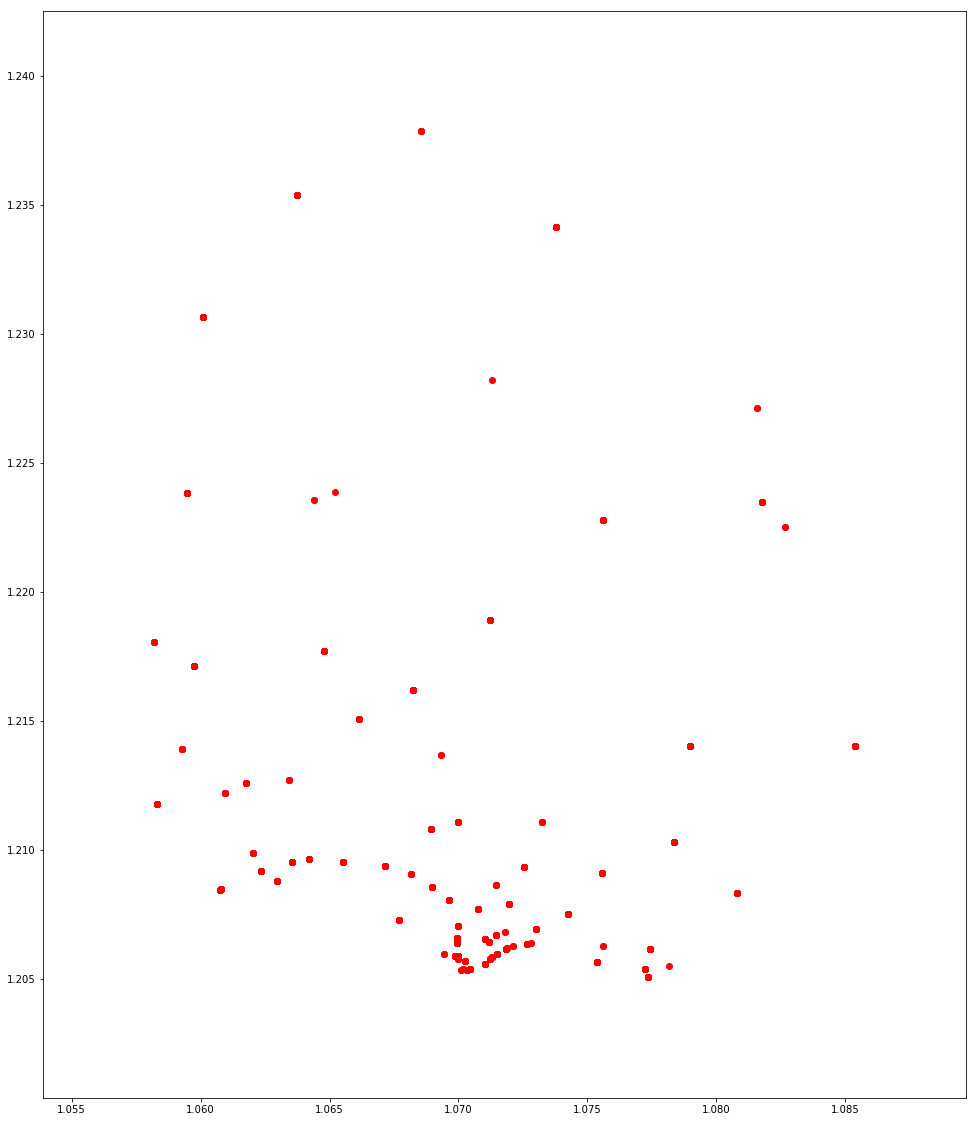

In [67]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
# uruguay.plot(ax=ax)
gpd.GeoDataFrame({'geometry': geom}).loc[].plot(ax=ax, color='red')
plt.show()